In [6]:
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import librosa

In [7]:
# Load the audio file
def audio_graph_plot(file_path):
    y, sr = librosa.load(file_path,sr=None) 
    # Takes the file path and Sampling Rate(sr), default sr=22050 and returns y(np.array of amplitude) , sr) 
#     print("Samples:",y)
#     print("Total Samples:",len(y))
#     print("Sampling rate:",sr)
    # Plot the waveform
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle('Species: Himalayan Monal', fontsize=16)

    # Plot the waveform
    librosa.display.waveshow(y, sr=sr, ax=axs[0]) # displays waveform in time domain
    axs[0].set_title('Waveform')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Amplitude')
    # Plot the spectrogram
    # plt.figure(figsize=(10, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    '''
    librosa.stft(y): Computes the Short-Time Fourier Transform of the audio signal,
    resulting in a complex-valued matrix representing the frequency content over time.

    np.abs(librosa.stft(y)): Converts the complex STFT matrix to a real-valued magnitude (amplitude) spectrum, 
    representing the strength of each frequency component over time.

    librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max): Converts the amplitude spectrum to a decibel (dB) scale using the maximum value as the reference, 
    normalizing the data and making it more suitable for visualization. 20log10(mag/ref)
    '''
    img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=axs[1]) # Spectrogram Representation
    fig.colorbar(img, ax=axs[1], format='%+2.0f dB')
    axs[1].set_title('Spectrogram')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Frequency (Hz)')


In [49]:
def remove_silence_manual(audio_file, window_size=70000, threshold=1):
    audio,sr= librosa.load(audio_file,sr=None)

    global_mean = np.mean(audio)
    start = 0
    end = len(audio) - 1
#     print("Global mean",global_mean)

    # Process from start
    while start < end:
        local_mean = np.mean(audio[start:start+window_size])
#         print("Local mean from start",local_mean)
        if local_mean < global_mean * threshold:
            start += window_size
        else:
            break

    # Process from end
    while end > start:
        local_mean = np.mean(audio[end-window_size:end])
#         print("Local mean from end",local_mean)
        if local_mean < global_mean * threshold:
            end -= window_size
        else:
            break

    silence_removed_array = audio[start:end]
    print(f"Original audio length: {len(audio)} samples")
    print(f"Cleaned audio length (Manual Function): {len(silence_removed_array)} samples")
    output_file_path = 'silence_removes_manual.mp3'
    sf.write(output_file_path,silence_removed_array,sr)

In [50]:
def remove_silence_librosa(audio_file):
    audio,sr= librosa.load(audio_file,sr=None)
    # Silence removal using librosa.effects.trim
    cleaned_audio_array_librosa,  _ = librosa.effects.trim(audio, top_db=25)
    # exporting cleaned audio:
    output_file_path = 'silence_audio_librosa.mp3'
    sf.write(output_file_path,cleaned_audio_array_librosa,sr)
    print(f"Cleaned audio length (librosa): {len(cleaned_audio_array_librosa)} samples")

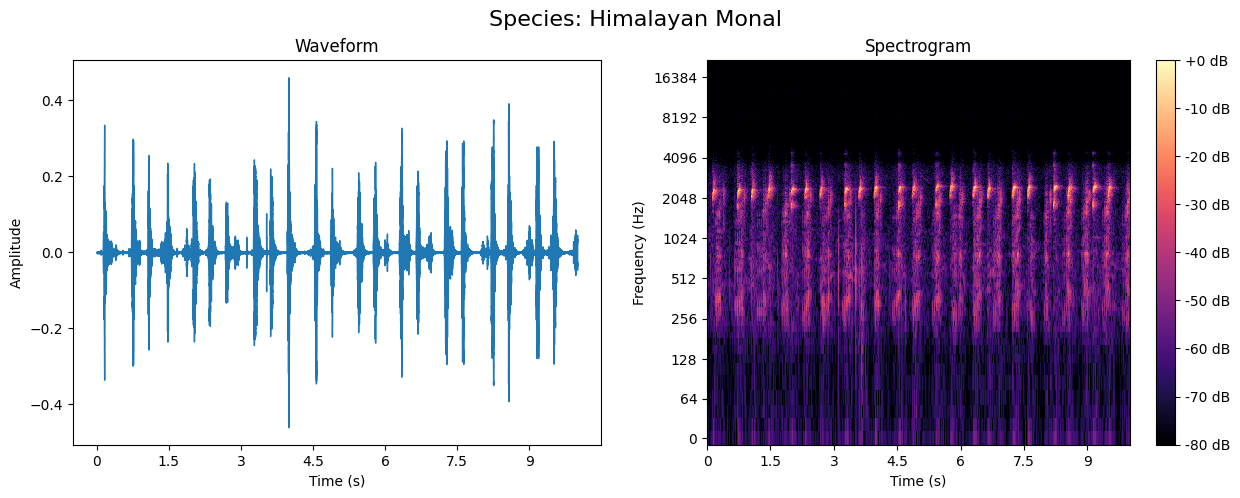

In [51]:
audio_file = '/Users/khatiwadaprajwal22icloud.com/Desktop/Visual studio code/Audio_Preprocessing/Silence_Removal/Himalayan Monal/XC114356 1.mp3'
audio_graph_plot(audio_file)


In [52]:
# silence removal custom function
remove_silence_manual(audio_file)
# silence removal custom function
remove_silence_librosa(audio_file)

Original audio length: 441000 samples
Cleaned audio length (Manual Function): 230999 samples
Cleaned audio length (librosa): 435880 samples


Silence Removed using Librosa


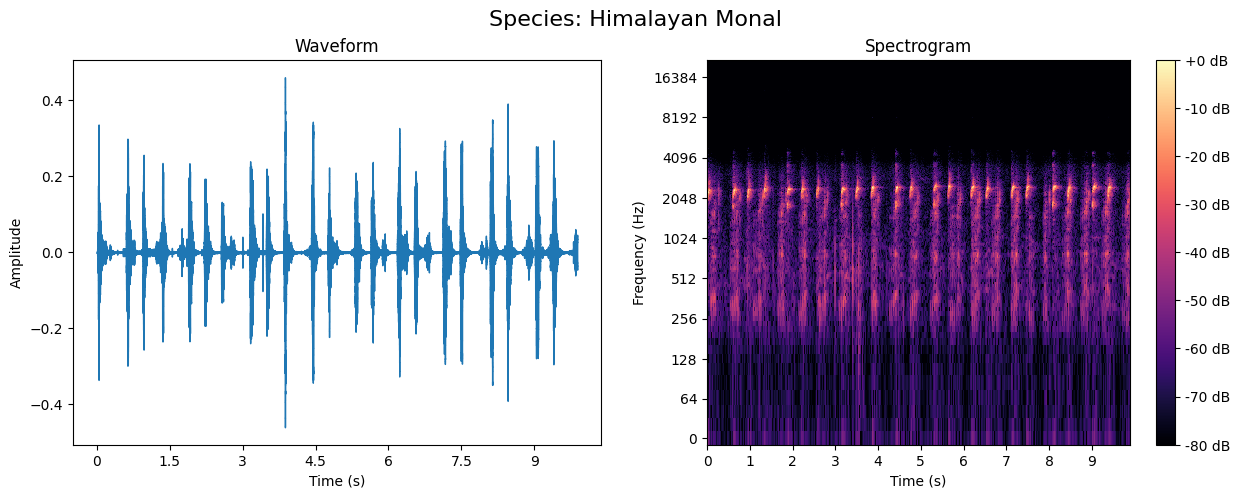

In [53]:
audio_file1 = '/Users/khatiwadaprajwal22icloud.com/Desktop/Visual studio code/Audio_Preprocessing/Silence_Removal/silence_audio_librosa.mp3'
print("Silence Removed using Librosa")
audio_graph_plot(audio_file1)



Silence Removed using Manual


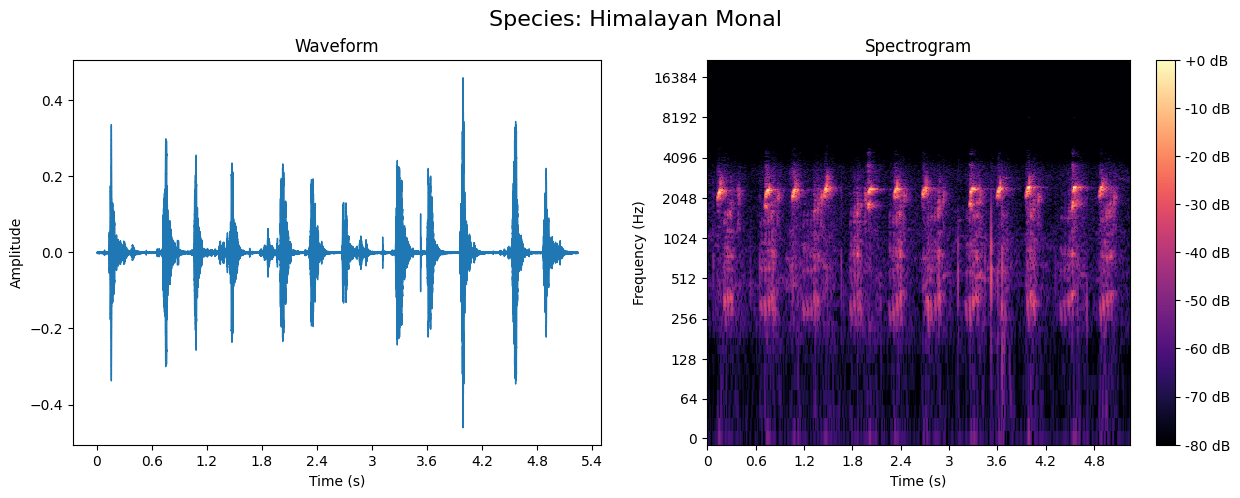

In [54]:
print("Silence Removed using Manual")
audio_file2 = '/Users/khatiwadaprajwal22icloud.com/Desktop/Visual studio code/Audio_Preprocessing/Silence_Removal/silence_removes_manual.mp3'
audio_graph_plot(audio_file2)

In [5]:
audio_file = '/Users/khatiwadaprajwal22icloud.com/Desktop/Visual studio code/Audio_Preprocessing/Silence_Removal/Egyption Vulture/vulture.mp3'

In [10]:
# silence removal custom function
remove_silence_manual(audio_file)
# silence removal custom function
remove_silence_librosa(audio_file)

Original audio length: 375412 samples
Cleaned audio length (Manual Function): 155411 samples
Cleaned audio length (librosa): 78336 samples


Silence Removed using Librosa


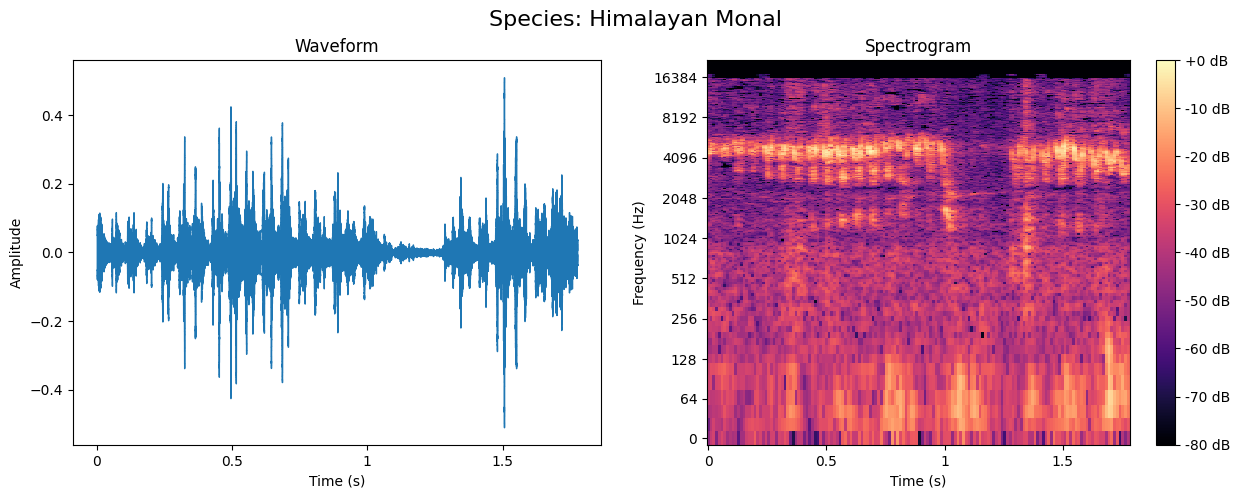

In [14]:
audio_file1 = '/Users/khatiwadaprajwal22icloud.com/Desktop/Visual studio code/Audio_Preprocessing/Silence_Removal/silence_audio_librosa.mp3'
print("Silence Removed using Librosa")
audio_graph_plot(audio_file1)

Silence Removed using Manual


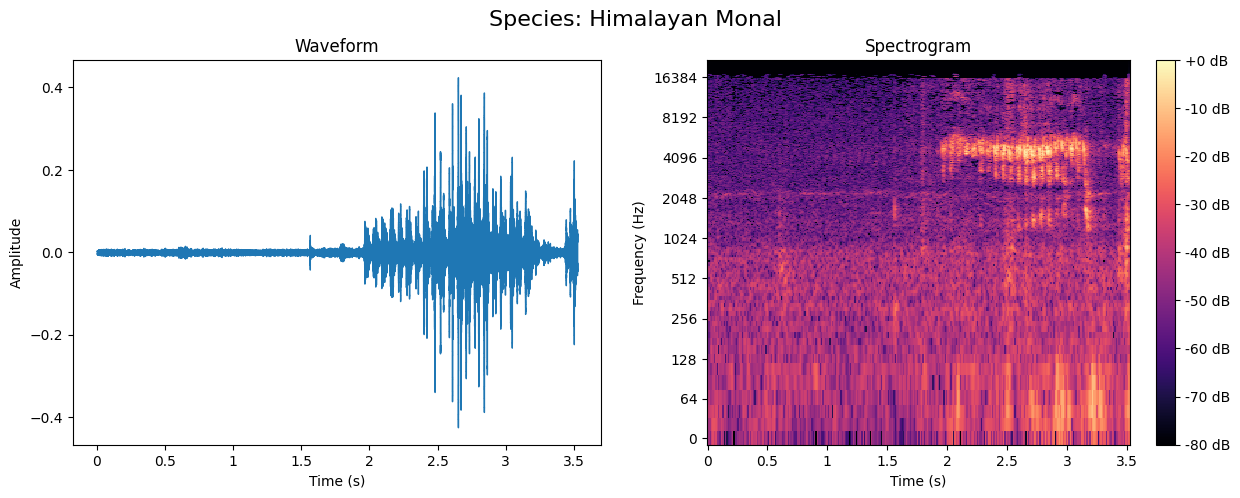

In [15]:
print("Silence Removed using Manual")
audio_file2 = '/Users/khatiwadaprajwal22icloud.com/Desktop/Visual studio code/Audio_Preprocessing/Silence_Removal/silence_removes_manual.mp3'
audio_graph_plot(audio_file2)